# How to classify a news headline into a relevant category?

`You are an DL Engineer at BBC.`

**`Problem Statement`:** BBC wants to auto categorize the news into various categories which will also help in recommending the right news articles to it users at a later stage.


`Note:` *BBC - British Broadcasting Corporation*

In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
import re
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/drive/MyDrive/SCALER/NLP/Git_Folder/bbc-news-data.csv", sep="\t")

In [3]:
df.head()

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...


In [4]:
df['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

In [5]:
print(df.shape)
df = df[((~df.title.isnull()) & (~df.content.isnull()))].reset_index(drop=True)
print(df.shape)


(2225, 4)
(2225, 4)


Text(0, 0.5, 'Count')

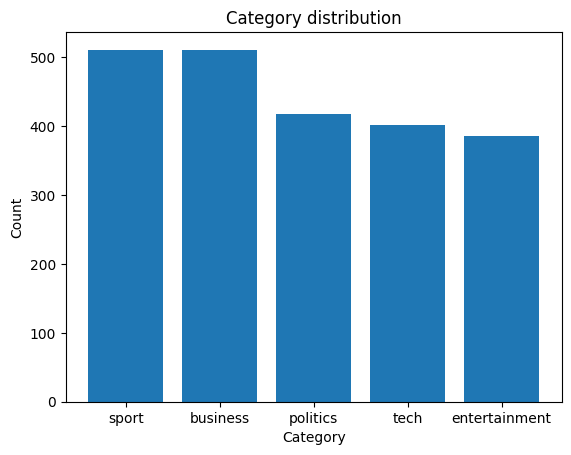

In [6]:
plt.bar(df.category.value_counts().index, df.category.value_counts().values)
plt.title('Category distribution')
plt.xlabel("Category")
plt.ylabel("Count")

In [7]:
ind=1807
print(f'Title: {df.title[ind]}')
print(f'Category: {df.category[ind]}')

Title: Federer joins all-time greats
Category: sport


# RNN PRACTICE

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
import re
import matplotlib.pyplot as plt

In [9]:
# from google.colab import drive
# drive.mount('/content/drive')

In [10]:
df.head(5)

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...


In [11]:
print("Shape of Data Set")
print(df.shape)
print("*"*100)
print(df.isnull())
print("Null values")
print("*"*100)
print(df.isnull().sum())


Shape of Data Set
(2225, 4)
****************************************************************************************************
      category  filename  title  content
0        False     False  False    False
1        False     False  False    False
2        False     False  False    False
3        False     False  False    False
4        False     False  False    False
...        ...       ...    ...      ...
2220     False     False  False    False
2221     False     False  False    False
2222     False     False  False    False
2223     False     False  False    False
2224     False     False  False    False

[2225 rows x 4 columns]
Null values
****************************************************************************************************
category    0
filename    0
title       0
content     0
dtype: int64


In [12]:
df = df[((~df.title.isnull()) & (~df.content.isnull()))].reset_index(drop= True)
df

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...
...,...,...,...,...
2220,tech,397.txt,BT program to beat dialler scams,BT is introducing two initiatives to help bea...
2221,tech,398.txt,Spam e-mails tempt net shoppers,Computer users across the world continue to i...
2222,tech,399.txt,Be careful how you code,A new European directive could put software w...
2223,tech,400.txt,US cyber security chief resigns,The man making sure US computer networks are ...


In [13]:
df.category.value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

<BarContainer object of 5 artists>

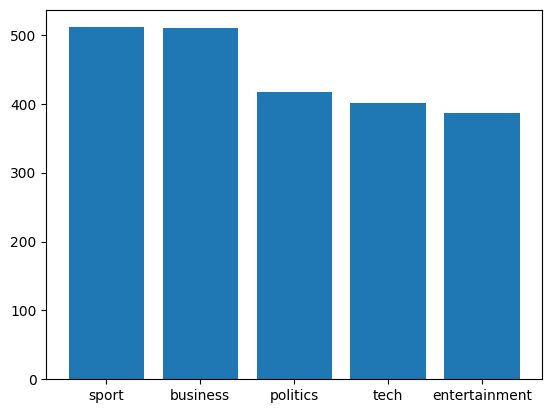

In [14]:
plt.bar(df.category.value_counts().index, df.category.value_counts().values)


#The main Code Implementation -- !!

In [15]:
!pip install tensorflow
!pip install keras

In [16]:
import tensorflow as tf
from tensorflow import keras

In [17]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Embedding, Input, InputLayer, RNN, SimpleRNN, LSTM, GRU, TimeDistributed
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [18]:
import string

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [19]:
def data_cleaning(text) :
  cleaned = text.lower()
  cleaned = cleaned.replace(".", ". ")
  tokens = [word for word in cleaned.split() if not word in stop_words]
  print(tokens)
  tokens = [tok.translate(str.maketrans(' ', ' ', string.punctuation)) for tok in tokens]
  print(f'after punctuation :{tokens}')
  cleaned = " ".join(tokens)
  print(f'after cleaned: {cleaned}')
  cleaned = cleaned.strip()
  return cleaned

In [ ]:
df['title'] = df['title'].apply(data_cleaning)

In [21]:
df.head(5)

,category,filename,title,content
0,business,001.txt,ad sales boost time warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,dollar gains greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,high fuel prices hit bas profits,British Airways has blamed high fuel prices f...
4,business,005.txt,pernod takeover talk lifts domecq,Shares in UK drinks and food firm Allied Dome...


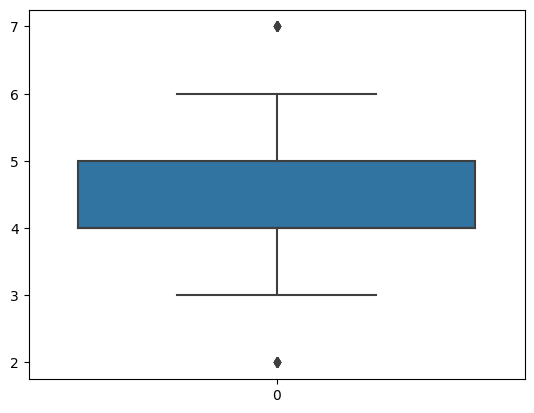

In [22]:
sns.boxplot(df['title'].str.split(" ").str.len())
plt.show()

# Now split the data in simple train and test :


In [23]:
max_sentence_len = df['title'].str.split(" ").str.len().max()
total_classes = df.category.nunique()

print(f"Maximum sequence length: {max_sentence_len}")
print(f"Total classes: {total_classes}")

Maximum sequence length: 7
Total classes: 5


# Splitting the data to train and test

In [24]:
np.random.seed(100)
train_X, test_X, train_Y, test_Y = train_test_split(df['title'],
                                                    df['category'],
                                                    test_size = 0.2,
                                                    random_state= 100)
train_X = train_X.reset_index(drop=True)
test_X = test_X.reset_index(drop=True)
train_Y = train_Y.reset_index(drop=True)
test_Y = test_Y.reset_index(drop=True)

In [25]:
train_X.shape, train_Y.shape, test_X.shape, test_Y.shape

((1780,), (1780,), (445,), (445,))

In [26]:
train_Y = pd.get_dummies(train_Y).values
test_Y = pd.get_dummies(test_Y).values

In [27]:
validation = test_Y.argmax(axis=1)
validation

array([4, 4, 3, 0, 3, 0, 3, 0, 3, 2, 1, 0, 4, 4, 3, 3, 4, 1, 3, 0, 3, 1,
       0, 3, 4, 1, 2, 3, 1, 3, 4, 0, 0, 4, 1, 4, 1, 2, 1, 1, 4, 0, 1, 2,
       2, 2, 1, 1, 1, 3, 0, 3, 2, 1, 2, 1, 0, 4, 0, 1, 4, 3, 0, 0, 3, 1,
       2, 3, 1, 1, 3, 2, 0, 4, 4, 4, 0, 2, 4, 0, 2, 1, 4, 3, 3, 3, 0, 4,
       2, 0, 0, 0, 1, 0, 1, 1, 1, 3, 4, 3, 2, 2, 3, 4, 2, 4, 3, 4, 2, 2,
       0, 4, 3, 1, 1, 3, 0, 0, 3, 3, 1, 1, 0, 3, 1, 0, 4, 0, 2, 0, 0, 1,
       2, 0, 1, 0, 0, 1, 3, 2, 0, 2, 4, 3, 2, 0, 4, 3, 1, 4, 3, 3, 3, 3,
       2, 2, 4, 2, 4, 3, 4, 3, 4, 4, 3, 4, 0, 0, 3, 2, 2, 1, 3, 0, 4, 1,
       2, 4, 3, 2, 4, 0, 0, 0, 2, 0, 2, 2, 0, 1, 3, 4, 4, 1, 3, 0, 0, 2,
       3, 4, 4, 3, 1, 3, 3, 2, 0, 1, 0, 0, 4, 1, 3, 4, 2, 2, 0, 3, 2, 1,
       2, 3, 4, 1, 2, 4, 2, 1, 2, 0, 1, 3, 3, 1, 1, 3, 3, 0, 0, 4, 2, 2,
       4, 3, 1, 3, 3, 3, 3, 4, 2, 0, 2, 2, 1, 0, 3, 0, 2, 0, 4, 3, 3, 0,
       3, 2, 0, 4, 4, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 4, 0, 2,
       2, 3, 4, 3, 0, 0, 1, 1, 0, 0, 2, 3, 3, 2, 3,

In [28]:
train_Y

array([[0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       ...,
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0]], dtype=uint8)

In [29]:
def tokenize_and_pad(inp_text, max_len, tok):

    text_seq = tok.texts_to_sequences(inp_text)
    text_seq = pad_sequences(text_seq, maxlen=max_len, padding='post')

    return text_seq

text_tok = Tokenizer()
text_tok.fit_on_texts(train_X)
# we just fit on train data because suppose we give sudhir as label 1 then in test data also we want to give it as same label that is the reason.
train_text_X = tokenize_and_pad(inp_text=train_X, max_len=max_sentence_len, tok=text_tok)
test_text_X = tokenize_and_pad(inp_text=test_X, max_len=max_sentence_len, tok=text_tok)
vocab_size = len(text_tok.word_index)+1

print("Overall text vocab size", vocab_size)

Overall text vocab size 3360


In [30]:
# Here my latent dimension is U, V, W Matrix
# Embedding Dim is intial embedding of each token
# Both are hyperparameters
latent_dim= 50
embedding_dim= 100

In [31]:
seed=56
tf.random.set_seed(seed)
np.random.seed(seed)

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, trainable=True))
model.add(SimpleRNN(latent_dim, recurrent_dropout=0.2, return_sequences=False, activation='tanh'))
model.add(Dense(total_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         336000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 50)                7550      
                                                                 
 dense (Dense)               (None, 5)                 255       
                                                                 
Total params: 343805 (1.31 MB)
Trainable params: 343805 (1.31 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
tf.random.set_seed(seed)
np.random.seed(seed)

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['acc'])

early_stopping = EarlyStopping(monitor='val_acc',
                               mode='max',
                               verbose=1,
                               patience=5)

model.fit(x=train_text_X, y=train_Y,
          validation_data=(test_text_X, test_Y),
          batch_size=64,
          epochs=10,
          callbacks=[early_stopping])

Epoch 1/10
28/28 [==============================] - 2s 23ms/step - loss: 1.5827 - acc: 0.2624 - val_loss: 1.5732 - val_acc: 0.2629
Epoch 2/10
28/28 [==============================] - 0s 11ms/step - loss: 1.3516 - acc: 0.5551 - val_loss: 1.3869 - val_acc: 0.4225
Epoch 3/10
28/28 [==============================] - 0s 12ms/step - loss: 0.7220 - acc: 0.8275 - val_loss: 0.9312 - val_acc: 0.6697
Epoch 4/10
28/28 [==============================] - 0s 11ms/step - loss: 0.2616 - acc: 0.9455 - val_loss: 0.9159 - val_acc: 0.6944
Epoch 5/10
28/28 [==============================] - 1s 19ms/step - loss: 0.1088 - acc: 0.9865 - val_loss: 0.9302 - val_acc: 0.7281
Epoch 6/10
28/28 [==============================] - 0s 17ms/step - loss: 0.0630 - acc: 0.9938 - val_loss: 1.0446 - val_acc: 0.7213
Epoch 7/10
28/28 [==============================] - 0s 18ms/step - loss: 0.0362 - acc: 0.9978 - val_loss: 1.0878 - val_acc: 0.7124
Epoch 8/10
28/28 [==============================] - 1s 19ms/step - loss: 0.0311 - a

In [33]:
model.save("BCC_classifier.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [34]:
model = tf.keras.models.load_model("BCC_classifier.h5")

In [35]:
prediction = model.predict(test_text_X)
prediction = prediction.argmax(axis=1)
print(f"Accuracy: {accuracy_score(prediction, validation)}")

14/14 [==============================] - 0s 5ms/step
Accuracy: 0.7325842696629213


Text(0.5, 1.0, 'Confusion Matrix')

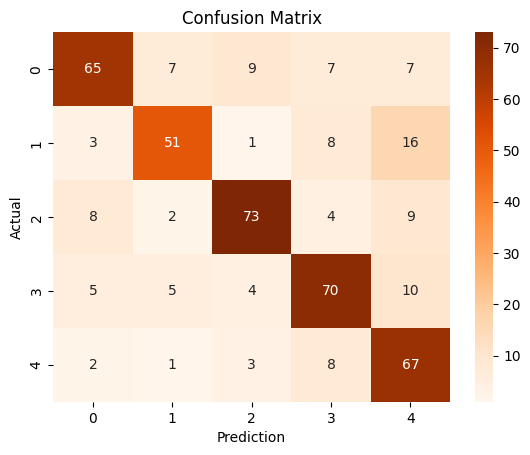

In [36]:
cm = confusion_matrix(validation, prediction)
sns.heatmap(cm, annot=True, cmap='Oranges')
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.title("Confusion Matrix")